In [196]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
import json
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import mean_squared_error, r2_score  
import os

In [197]:
import os
file_path = "/Users/linlee10/Desktop/personal_projects/Stonk.csv"
df = pd.read_csv(file_path)
print(df.head())

   Unnamed: 0        Date  Natural_Gas_Price  Natural_Gas_Vol.  \
0           0  02-02-2024              2.079               NaN   
1           1  01-02-2024              2.050          161340.0   
2           2  31-01-2024              2.100          142860.0   
3           3  30-01-2024              2.077          139750.0   
4           4  29-01-2024              2.490            3590.0   

   Crude_oil_Price  Crude_oil_Vol.  Copper_Price  Copper_Vol. Bitcoin_Price  \
0            72.28             NaN        3.8215          NaN     43,194.70   
1            73.82        577940.0        3.8535          NaN     43,081.40   
2            75.85        344490.0        3.9060          NaN     42,580.50   
3            77.82        347240.0        3.9110          NaN     42,946.20   
4            76.78        331930.0        3.8790          NaN     43,299.80   

   Bitcoin_Vol.  ... Berkshire_Price  Berkshire_Vol. Netflix_Price  \
0       42650.0  ...        5,89,498         10580.0      

In [198]:
df.columns = df.columns.str.strip().str.rstrip(".")
print(df.columns.tolist())
df.head()


['Unnamed: 0', 'Date', 'Natural_Gas_Price', 'Natural_Gas_Vol', 'Crude_oil_Price', 'Crude_oil_Vol', 'Copper_Price', 'Copper_Vol', 'Bitcoin_Price', 'Bitcoin_Vol', 'Platinum_Price', 'Platinum_Vol', 'Ethereum_Price', 'Ethereum_Vol', 'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol', 'Apple_Price', 'Apple_Vol', 'Tesla_Price', 'Tesla_Vol', 'Microsoft_Price', 'Microsoft_Vol', 'Silver_Price', 'Silver_Vol', 'Google_Price', 'Google_Vol', 'Nvidia_Price', 'Nvidia_Vol', 'Berkshire_Price', 'Berkshire_Vol', 'Netflix_Price', 'Netflix_Vol', 'Amazon_Price', 'Amazon_Vol', 'Meta_Price', 'Meta_Vol', 'Gold_Price', 'Gold_Vol']


,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol,Crude_oil_Price,Crude_oil_Vol,Copper_Price,Copper_Vol,Bitcoin_Price,Bitcoin_Vol,...,Berkshire_Price,Berkshire_Vol,Netflix_Price,Netflix_Vol,Amazon_Price,Amazon_Vol,Meta_Price,Meta_Vol,Gold_Price,Gold_Vol
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [199]:
df.drop([
    'Unnamed: 0', 'Natural_Gas_Price', 'Natural_Gas_Vol', 
    'Crude_oil_Price', 'Crude_oil_Vol', 'Copper_Price', 'Bitcoin_Price', 
    'Bitcoin_Vol', 'Ethereum_Price', 'Ethereum_Vol', 'S&P_500_Price', 
    'Nasdaq_100_Price', 'Nasdaq_100_Vol','Copper_Price', 'Copper_Vol', 'Platinum_Price', 'Platinum_Vol', 
    'Silver_Price', 'Silver_Vol', 'Gold_Price', 'Gold_Vol'], axis=1, inplace=True)

print(df.columns)

Index(['Date', 'Apple_Price', 'Apple_Vol', 'Tesla_Price', 'Tesla_Vol',
       'Microsoft_Price', 'Microsoft_Vol', 'Google_Price', 'Google_Vol',
       'Nvidia_Price', 'Nvidia_Vol', 'Berkshire_Price', 'Berkshire_Vol',
       'Netflix_Price', 'Netflix_Vol', 'Amazon_Price', 'Amazon_Vol',
       'Meta_Price', 'Meta_Vol'],
      dtype='object')


In [200]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df.set_index('Date', inplace=True)
df.fillna(method='ffill', inplace=True)
df['Days'] = (df.index - df.index.min()).days

/var/folders/bl/mqws6wg56fd4kx04h4c68qt00000gn/T/ipykernel_89961/1241230727.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Index(['Apple_Price', 'Apple_Vol', 'Tesla_Price', 'Tesla_Vol',
       'Microsoft_Price', 'Microsoft_Vol', 'Google_Price', 'Google_Vol',
       'Nvidia_Price', 'Nvidia_Vol', 'Berkshire_Price', 'Berkshire_Vol',
       'Netflix_Price', 'Netflix_Vol', 'Amazon_Price', 'Amazon_Vol',
       'Meta_Price', 'Meta_Vol', 'Days'],
      dtype='object')


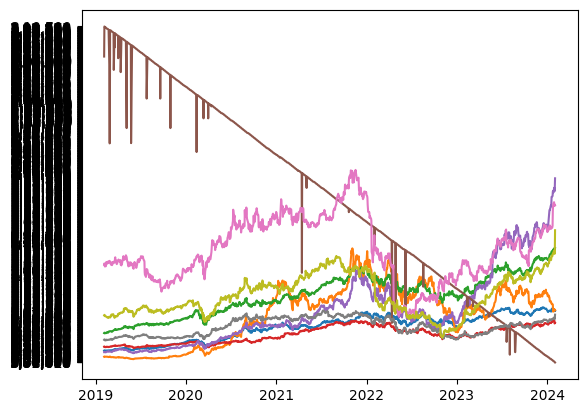

In [201]:
stock_columns = ('Apple_Price', 'Tesla_Price', 'Microsoft_Price', 'Google_Price', 
    'Nvidia_Price', 'Berkshire_Price', 'Netflix_Price', 'Amazon_Price', 'Meta_Price')

for stock in stock_columns:
    plt.plot(df.index, df[stock], label=stock)
print(df.columns)

Index(['Apple_Price', 'Apple_Vol', 'Tesla_Price', 'Tesla_Vol',
       'Microsoft_Price', 'Microsoft_Vol', 'Google_Price', 'Google_Vol',
       'Nvidia_Price', 'Nvidia_Vol', 'Berkshire_Price', 'Berkshire_Vol',
       'Netflix_Price', 'Netflix_Vol', 'Amazon_Price', 'Amazon_Vol',
       'Meta_Price', 'Meta_Vol', 'Days', 'Year'],
      dtype='object')


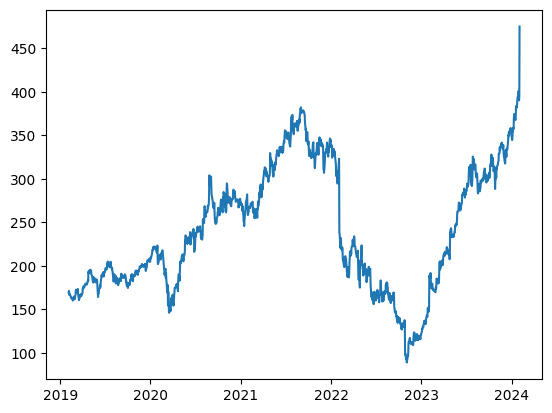

In [236]:
df['Year'] = df.index.year
target_stock = 'Meta_Price'
X = df[['Days']]
y = df[target_stock]
plt.plot(df.index, y)
#isolated apple stock price over the past years

print(df.columns)


<function matplotlib.pyplot.show(close=None, block=None)>

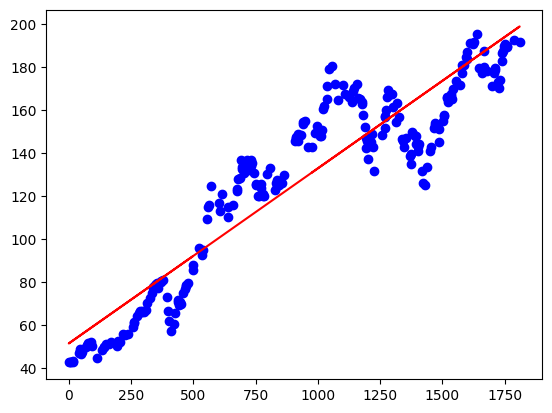

In [219]:
#basic linear regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Actual Apple Price')  # Actual values
plt.plot(X_test, y_pred, color='red', label='Predicted Apple Price')  # Predicted values
plt.show

Tesla - MSE: 5621.86, RMSE: 74.98, R²: 0.50
Amazon - MSE: 892.51, RMSE: 29.87, R²: 0.04


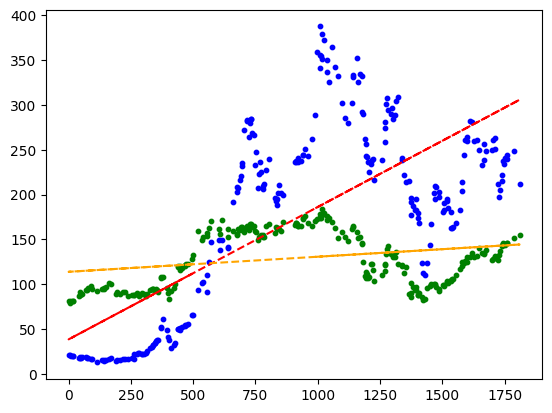

In [245]:
target_stock_1 = 'Tesla_Price'
target_stock_2 = 'Amazon_Price'

#Tesla first
X1 = df[['Days']]
y1 = df[[target_stock_1]]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
model1 = LinearRegression()
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)

plt.scatter(X1_test, y1_test, color='blue', s = 10, label='Actual Tesla Price')
plt.plot(X1_test, y1_pred, color='red', label='Predicted Tesla Price', linestyle='--')

mse_tesla = mean_squared_error(y1_test, y1_pred)
rmse_tesla = np.sqrt(mse_tesla)
r2_tesla = r2_score(y1_test, y1_pred)

#Amazon 
X2 = df[['Days']]
y2 = df[target_stock_2]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state=42)
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

plt.scatter(X2_test, y2_test, color='green', s = 10, label='Actual Amazon Price')
plt.plot(X2_test, y2_pred, color='orange', label='Predicted Amazon Price', linestyle='--')

mse_amazon = mean_squared_error(y2_test, y2_pred)
rmse_amazon = np.sqrt(mse_amazon)
r2_amazon = r2_score(y2_test, y2_pred)

print(f"Tesla - MSE: {mse_tesla:.2f}, RMSE: {rmse_tesla:.2f}, R²: {r2_tesla:.2f}")
print(f"Amazon - MSE: {mse_amazon:.2f}, RMSE: {rmse_amazon:.2f}, R²: {r2_amazon:.2f}")

#tesla RMSE, about 74.98 from each interpretation on average, R^2 of 0.5 is about 50% variance in the stock, lots of room for improvement
#amazon RMSE about 30 off on average, 0.04 R^2 is very innacurate tons of room for improvement

Meta Stock Prediction - MSE: 818.26, RMSE: 28.61, R²: 0.83
Model accuracy: 0.85 on training data, 0.83 on test data.


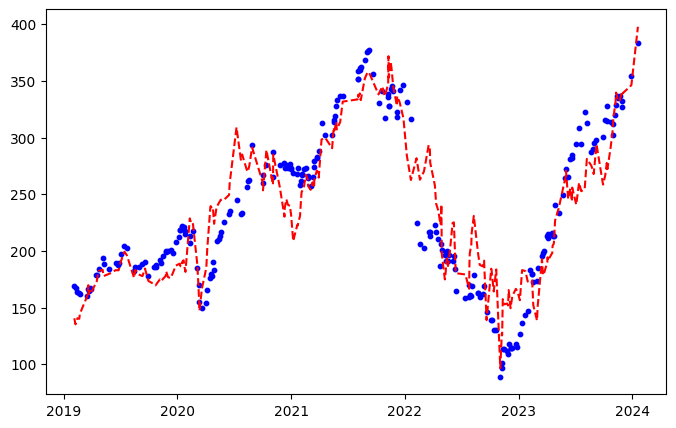

In [256]:
#Multivariable Regression on Meta 
target_v2 = "Meta_Price"
features = ['Apple_Price', 'Tesla_Price', 'Microsoft_Price', 'Google_Price', 'Amazon_Price']

clean = df.dropna(subset=[target_v2] + features)

X = clean[features]
y = clean[target_v2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Meta Stock Prediction - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

#Visualize
sorted_indices = X_test.index.argsort()
sorted_X_test_index = X_test.index[sorted_indices]
sorted_y_test = y_test.iloc[sorted_indices]
sorted_y_pred = y_pred[sorted_indices]

plt.figure(figsize=(8, 5))
plt.scatter(sorted_X_test_index, sorted_y_test, color='blue', s=10, label='Actual Meta Price')
plt.plot(sorted_X_test_index, sorted_y_pred, color='red', linestyle='--', label='Predicted Meta Price')

print(f"Model accuracy: {model.score(X_train, y_train):.2f} on training data, {model.score(X_test, y_test):.2f} on test data.")

